# 0. Configuration des chemins

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [3]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Téléchargement des modèles pré-entraînés de modèles TF à partir de Tensorflow Model Zoo et installation de TFOD ( tensorflow object detection)

In [6]:
# https://www.tensorflow.org/install/source_windows

In [7]:
if os.name=='nt':
    !pip install wget
    import wget

In [8]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [9]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Processing /home/fatimaazzahrae/tensorflow_object_detection/TFODCourse/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1696773 sha256=b3165ae2dae3a2bd4e0ecd4a6601abbc0c86f6f1baa85ae236e684616dd38e2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-myship0z/wheels/0b/fe/e4/a6b9b03b031430d43d003a847b8aeac14c3820f1b67ea4162f
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [10]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2023-02-09 09:48:17.594830: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 09:48:17.942196: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 09:48:17.942259: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-09 09:48:18.961569: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.06s
I0209 09:48:23.845030 139846818588480 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.06s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.06s
I0209 09:48:23.904146 139846818588480 test_util.py:2457] time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.06s
[       OK ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.02s
I0209 09:48:23.923072 139846818588480 test_util.py:2457] time(__main__.Model

I0209 09:48:26.377871 139846818588480 ssd_efficientnet_bifpn_feature_extractor.py:150] EfficientDet EfficientNet backbone version: efficientnet-b2
I0209 09:48:26.377973 139846818588480 ssd_efficientnet_bifpn_feature_extractor.py:152] EfficientDet BiFPN num filters: 112
I0209 09:48:26.378006 139846818588480 ssd_efficientnet_bifpn_feature_extractor.py:153] EfficientDet BiFPN num iterations: 5
I0209 09:48:26.379122 139846818588480 efficientnet_model.py:143] round_filter input=32 output=32
I0209 09:48:26.388920 139846818588480 efficientnet_model.py:143] round_filter input=32 output=32
I0209 09:48:26.388970 139846818588480 efficientnet_model.py:143] round_filter input=16 output=16
I0209 09:48:26.466022 139846818588480 efficientnet_model.py:143] round_filter input=16 output=16
I0209 09:48:26.466118 139846818588480 efficientnet_model.py:143] round_filter input=24 output=24
I0209 09:48:26.605278 139846818588480 efficientnet_model.py:143] round_filter input=24 output=24
I0209 09:48:26.605372 13

I0209 09:48:29.367545 139846818588480 efficientnet_model.py:143] round_filter input=16 output=24
I0209 09:48:29.367639 139846818588480 efficientnet_model.py:143] round_filter input=24 output=32
I0209 09:48:29.568890 139846818588480 efficientnet_model.py:143] round_filter input=24 output=32
I0209 09:48:29.568987 139846818588480 efficientnet_model.py:143] round_filter input=40 output=56
I0209 09:48:29.783030 139846818588480 efficientnet_model.py:143] round_filter input=40 output=56
I0209 09:48:29.783130 139846818588480 efficientnet_model.py:143] round_filter input=80 output=112
I0209 09:48:30.107128 139846818588480 efficientnet_model.py:143] round_filter input=80 output=112
I0209 09:48:30.107289 139846818588480 efficientnet_model.py:143] round_filter input=112 output=160
I0209 09:48:30.602119 139846818588480 efficientnet_model.py:143] round_filter input=112 output=160
I0209 09:48:30.602220 139846818588480 efficientnet_model.py:143] round_filter input=192 output=272
I0209 09:48:31.056789 

I0209 09:48:35.349672 139846818588480 efficientnet_model.py:143] round_filter input=112 output=200
I0209 09:48:35.349775 139846818588480 efficientnet_model.py:143] round_filter input=192 output=344
I0209 09:48:36.036521 139846818588480 efficientnet_model.py:143] round_filter input=192 output=344
I0209 09:48:36.036631 139846818588480 efficientnet_model.py:143] round_filter input=320 output=576
I0209 09:48:36.255063 139846818588480 efficientnet_model.py:143] round_filter input=1280 output=2304
I0209 09:48:36.289884 139846818588480 efficientnet_model.py:453] Building model efficientnet with params ModelConfig(width_coefficient=1.8, depth_coefficient=2.6, resolution=528, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

In [11]:
import object_detection

In [52]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.6.2
apache-beam                   2.44.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
cachetools                    5.3.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.2
contextlib2                   21.6.0
contourpy                     1.0.7
crcmod                        1.7
cycler                        0.11.0
Cython   

In [13]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
anyio                         3.6.2
apache-beam                   2.44.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
asttokens                     2.2.1
astunparse                    1.6.3
attrs                         22.2.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
cachetools                    5.3.0
certifi                       2022.12.7
cffi                          1.15.1
charset-normalizer            3.0.1
click                         8.1.3
cloudpickle                   2.2.1
colorama                      0.4.6
comm                          0.1.2
contextlib2                   21.6.0
contourpy                     1.0.7
crcmod                        1.7
cycler                        0.11.0
Cython   

In [12]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2023-02-09 09:48:47--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 216.58.211.208, 2a00:1450:4006:809::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|216.58.211.208|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19,56M  2,36MB/s    in 8,4s    

2023-02-09 09:48:56 (2,33 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tp

# 2. Création de la carte d'étiquettage ( label map)

In [13]:
#labels = [{'name':'ThumbsUp', 'id':1}, {'name':'ThumbsDown', 'id':2}, {'name':'ThankYou', 'id':3}, {'name':'LiveLong', 'id':4}]
labels = [{'name':'laitue', 'id':1}, {'name':'pates', 'id':2}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Création d'enregistrements TF

In [14]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

Tensorflow/workspace/images/train/
Tensorflow/workspace/images/train/salade_pate_Color_1674733332342.01000976562500.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761494271.03247070312500.png
Tensorflow/workspace/images/train/salade_Color_1674734718368.60815429687500.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761494471.40112304687500.png
Tensorflow/workspace/images/train/image_pate_Color_1674637705399.22973632812500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733332742.21948242187500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733330006.90356445312500.png
Tensorflow/workspace/images/train/salade_Color_1674734672060.38964843750000.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761494604.98413085937500.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761437292.02490234375000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733333275.69995117187500.xml
Tensorflow/workspace/images/train/salade_pate_Col

Tensorflow/workspace/images/train/salade_pate_Color_1674733333075.40380859375000.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761495939.99438476562500.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761438092.76904296875000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733344484.35449218750000.xml
Tensorflow/workspace/images/train/salade_Color_1674734716833.44750976562500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733339147.20117187500000.png
Tensorflow/workspace/images/train/salade_Color_1674734715899.57788085937500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637705399.22973632812500.xml
Tensorflow/workspace/images/train/salade_Color_1674734712834.30322265625000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733340814.69091796875000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733331407.47070312500000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733332742.21948242187500.png


Tensorflow/workspace/images/train/salade_pate_Color_1674733330473.95483398437500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733332609.02587890625000.png
Tensorflow/workspace/images/train/image_pate_Color_1674637404311.92187500000000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733338079.26953125000000.xml
Tensorflow/workspace/images/train/salade_Color_1674734718835.67163085937500.xml
Tensorflow/workspace/images/train/salade_Color_1674734722438.19970703125000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733331607.92651367187500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733335810.89111328125000.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761496206.97583007812500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637403644.89379882812500.xml
Tensorflow/workspace/images/train/salade_Color_1674734718568.77661132812500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733338680.05590820312500.xml

Tensorflow/workspace/images/train/salade_pate_Color_1674733334009.97802734375000.xml
Tensorflow/workspace/images/train/salade_Color_1674734718301.83666992187500.xml
Tensorflow/workspace/images/train/salade_Color_1674734714966.17578125000000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733337678.73510742187500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733331141.35717773437500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733337612.12207031250000.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761436424.93652343750000.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637706533.43383789062500.xml
Tensorflow/workspace/images/train/salade_Color_1674734715699.46679687500000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733339747.25390625000000.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761437959.29614257812500.png
Tensorflow/workspace/images/train/image_pate_Color_1674637520729.56884765625000.xml
T

Tensorflow/workspace/images/train/salade_Color_1674734712301.11914062500000.xml
Tensorflow/workspace/images/train/salade_Color_1674734717967.98339843750000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733330674.79516601562500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637706199.86889648437500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733334810.77807617187500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733339413.47363281250000.xml
Tensorflow/workspace/images/train/salade_Color_1674734718969.12036132812500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733344417.40600585937500.xml
Tensorflow/workspace/images/train/salade_Color_1674734672727.76367187500000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733336677.90551757812500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733331341.46728515625000.png
Tensorflow/workspace/images/train/image_pate_Color_1674637707667.48388671875000.xml
Te

Tensorflow/workspace/images/train/image_pate_Color_1674637707600.76538085937500.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761494738.57055664062500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637403978.40991210937500.xml
Tensorflow/workspace/images/train/salade_Color_1674734722838.45532226562500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733334543.22875976562500.xml
Tensorflow/workspace/images/train/salade_Color_1674734715632.76245117187500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733340348.11523437500000.png
Tensorflow/workspace/images/train/salade_Color_1674734721571.03002929687500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637405846.34643554687500.png
Tensorflow/workspace/images/train/salade_Color_1674734670325.72534179687500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733337412.27832031250000.png
Tensorflow/workspace/images/train/image_pate_Color_1674637706933.69409179687500.xml
Tensor

Tensorflow/workspace/images/train/salade_pate_Color_1674733335544.52612304687500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733332342.01000976562500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637706266.58203125000000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733338879.91210937500000.png
Tensorflow/workspace/images/train/salade_Color_1674734722771.74536132812500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637522464.21899414062500.xml
Tensorflow/workspace/images/train/salade_Color_1674734722638.32495117187500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733338879.91210937500000.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637707934.51293945312500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637405379.31079101562500.xml
Tensorflow/workspace/images/train/salade_Color_1674734670459.26489257812500.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761494738.57055664062500.png
T

Tensorflow/workspace/images/train/salade_pate_Color_1674733340480.83398437500000.png
Tensorflow/workspace/images/train/image_pate_Color_1674637706800.27807617187500.png
Tensorflow/workspace/images/train/salade_Color_1674734717300.36694335937500.png
Tensorflow/workspace/images/train/salade_Color_1674734722371.49511718750000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733337812.10864257812500.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761494872.09008789062500.png
Tensorflow/workspace/images/train/image_pate_Color_1674637706733.57006835937500.png
Tensorflow/workspace/images/train/salade_Color_1674734718034.75292968750000.png
Tensorflow/workspace/images/train/salade_Color_1674734673528.32275390625000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733330540.70068359375000.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761495806.52050781250000.png
Tensorflow/workspace/images/train/salade_Color_1674734715832.87451171875000.xml
Tensorflow/

Tensorflow/workspace/images/train/salade_pate_Color_1674733330607.07543945312500.png
Tensorflow/workspace/images/train/pate_vide_Color_1675761494404.61083984375000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733331274.97290039062500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733336345.48120117187500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733331941.37109375000000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733331207.82714843750000.png
Tensorflow/workspace/images/train/salade_Color_1674734715099.35815429687500.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733340014.46362304687500.xml
Tensorflow/workspace/images/train/pate_vide_Color_1675761437825.82592773437500.xml
Tensorflow/workspace/images/train/salade_Color_1674734672327.33691406250000.png
Tensorflow/workspace/images/train/image_pate_Color_1674637707800.99755859375000.xml
Tensorflow/workspace/images/train/salade_pate_Color_1674733336945.23071289062500

Tensorflow/workspace/images/train/salade_pate_Color_1674733340081.08959960937500.xml
Tensorflow/workspace/images/train/salade_Color_1674734718502.05371093750000.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637705732.87646484375000.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733338346.11157226562500.xml
Tensorflow/workspace/images/train/salade_Color_1674734671993.65307617187500.png
Tensorflow/workspace/images/train/salade_pate_Color_1674733336011.67529296875000.xml
Tensorflow/workspace/images/train/salade_Color_1674734712567.72778320312500.png
Tensorflow/workspace/images/train/salade_Color_1674734715632.76245117187500.xml
Tensorflow/workspace/images/train/salade_Color_1674734713167.47778320312500.png
Tensorflow/workspace/images/train/image_pate_Color_1674637405846.34643554687500.xml
Tensorflow/workspace/images/train/salade_Color_1674734670459.26489257812500.xml
Tensorflow/workspace/images/train/image_pate_Color_1674637520996.40625000000000.xml
Tensorflow/wo

In [15]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [16]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspace/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspace/annotations/test.record


# 4. Copie du modèle de configuration dans le dossier d'entrainement

In [17]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

# 5. Mise à jour de la configuration pour le Transfer Learning

In [18]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

2023-02-09 09:49:16.132885: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 09:49:16.313693: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-09 09:49:16.313718: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-09 09:49:17.065053: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [19]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG']) # don't forget to modify that

In [20]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [21]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [22]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [23]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Entrainement du modèle

In [24]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [25]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [26]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --num_train_steps=10000


# 7. Évaluation du modèle

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [28]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspace/models/my_ssd_mobnet --pipeline_config_path=Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config --checkpoint_dir=Tensorflow/workspace/models/my_ssd_mobnet


# 8. Téléchargement du modèle entrainé depuis le Checkpoint

In [121]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [122]:
# Load pipeline config and build a detection model

configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

#print(ckpt)
#print(paths['CHECKPOINT_PATH'])

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-13')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Détéction depuis une image

In [123]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [124]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [135]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'salade_pate_Color_1674733346420.24243164062500.png')

In [136]:
IMAGE_PATH

'Tensorflow/workspace/images/test/salade_pate_Color_1674733346420.24243164062500.png'

100
[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 2 1 2 1 2 2 2 1
 1 1 2 2 1 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 1 1 2 1 1 1 2 1 2 1 2 1 2 1
 1 1 2 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 2 2 1 2 2 2 1 1]


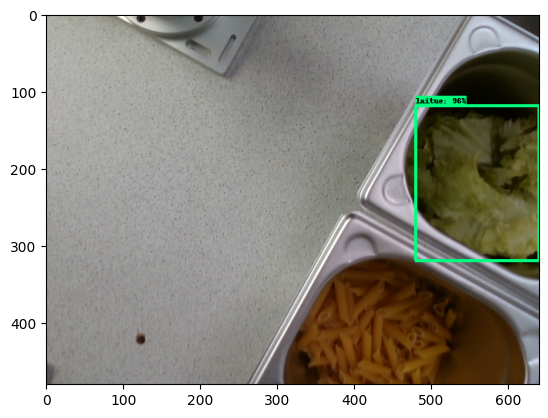

In [138]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))

print(num_detections)
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}

detections['num_detections'] = num_detections

#print(detections)
# detection_classes should be ints.

detections['detection_classes'] = detections['detection_classes'].astype(np.int64)


label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=3,
            min_score_thresh=.5,
            agnostic_mode=False)

print(detections['detection_classes'] + label_id_offset)
#print(detections['detection_scores'])

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [93]:
print(category_index[detections['detection_classes'][1]+label_id_offset])

{'id': 2, 'name': 'pates'}


# 10. Détéctions en temps réel depuis votre caméra

In [ ]:
!pip uninstall opencv-python-headless -y

In [14]:
cap = cv2.VideoCapture(0) # nombre qui peut changer selon l'os et la caméra
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [15]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [16]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [17]:
print(command)

python Tensorflow\models\research\object_detection\exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\export


In [18]:
!{command}

2021-04-03 11:51:42.281339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.712115: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:51:44.712813: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:51:44.734951: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:51:44.734976: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:51:44.738520: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 11. Conversion to TFJS

In [19]:
!pip install tensorflowjs

  Using cached tensorflowjs-3.3.0-py3-none-any.whl (63 kB)
  Using cached tensorflow_hub-0.9.0-py2.py3-none-any.whl (103 kB)
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [20]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [21]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow\workspace\models\my_ssd_mobnet\export\saved_model Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport


In [22]:
!{command}

Writing weight file Tensorflow\workspace\models\my_ssd_mobnet\tfjsexport\model.json...


2021-04-03 11:54:23.153051: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.644887: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:54:25.645576: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:54:25.667969: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:54:25.668001: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:54:25.671400: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [23]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [24]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [25]:
print(command)

python Tensorflow\models\research\object_detection\export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --trained_checkpoint_dir=Tensorflow\workspace\models\my_ssd_mobnet --output_directory=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport


In [26]:
!{command}

2021-04-03 11:55:05.530772: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.004889: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:08.005672: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:08.028532: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:08.028559: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:08.032092: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

2021-04-03 11:55:14.884114: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      0 
2021-04-03 11:55:14.884117: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1280] 0:   N 
2021-04-03 11:55:14.884182: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1406] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 6611 MB memory) -> physical GPU (device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:2b:00.0, compute capability: 7.5)
2021-04-03 11:55:14.884197: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
W0403 11:55:15.360029 15552 save_impl.py:78] Skipping full serialization of Keras layer <object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch object at 0x00000224AC2B1908>, because it is not built.
W0403 11:55:15.925411 15552 save_impl.py:78] Skipping full serialization of Keras layer <tensorflow.python.keras.layers.convolutional.SeparableConv2D object at 0x00000224D6D42B00>, bec

In [27]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [28]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [29]:
print(command)

tflite_convert --saved_model_dir=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model --output_file=Tensorflow\workspace\models\my_ssd_mobnet\tfliteexport\saved_model\detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [30]:
!{command}

2021-04-03 11:55:38.653963: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.159460: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-03 11:55:41.160164: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library nvcuda.dll
2021-04-03 11:55:41.183623: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: GeForce RTX 2070 SUPER computeCapability: 7.5
coreClock: 1.785GHz coreCount: 40 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2021-04-03 11:55:41.183649: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cudart64_110.dll
2021-04-03 11:55:41.187402: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library cublas64_11.dll
202

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')